In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
r2022=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2022.csv")
r2021=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2021.csv")
r2020=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2020.csv")
r2019=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2019.csv")
r2018=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2018.csv")
r2017=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2017.csv")
r2016=pd.read_csv("C:\\Users\\khush\\OneDrive\\Desktop\\Radiance\\radiation2016.csv")

In [3]:
radyears=[r2022,r2021,r2020,r2019,r2018,r2017,r2016]

In [4]:
rows=r2022.shape[0]
cols=r2022.shape[1]
rows,cols

(4182, 5)

In [5]:
for k in range (len(radyears)):
    
    this=radyears[k]    
    ya=list()
    for i in range(rows):
        curya=0
        for j in range(1,cols):
            curya=curya+this.iloc[i,j]
        ya.append(curya)
    this['Yearly Average']=ya
    radyears[k]=this

## 1. Top Absolute Radiation for ACs

In [6]:
t2022=dict()
for i in range(rows):
    curavg=0
    for j in range(1,cols):
        curavg=curavg+r2022.iloc[i,j]
    t2022[r2022.iloc[i,0]]=curavg*3

In [7]:
t2022=sorted(t2022.items(), key=lambda x:x[1],reverse=True)

ac=list()
tot=list()
for i in range(rows):
    ac.append(t2022[i][0])
    tot.append(t2022[i][1])
    
ntot=list()
b=max(tot)
s=min(tot)
for i in tot:
    x=(i-s)/(b-s)
    ntot.append(x)
    
topsorted=pd.DataFrame({'AC':ac, 'Total 2022':tot, 'Normalized':ntot})

In [8]:
top=topsorted[:20]
top

,AC,Total 2022,Normalized
0,Goshamahal,880.514652,1.000000
1,Matia Mahal,866.663220,0.984269
2,Yakutpura,781.882443,0.887983
3,Charminar,771.558277,0.876258
4,Bahadurpura,764.087560,0.867774
5,JORASANKO,688.731597,0.782192
6,Janakpuri,680.811103,0.773197
7,Mahalakshmi Layout,680.593170,0.772949
8,Wazirpur,671.234133,0.762320
9,Vishwas Nagar,665.598845,0.755920


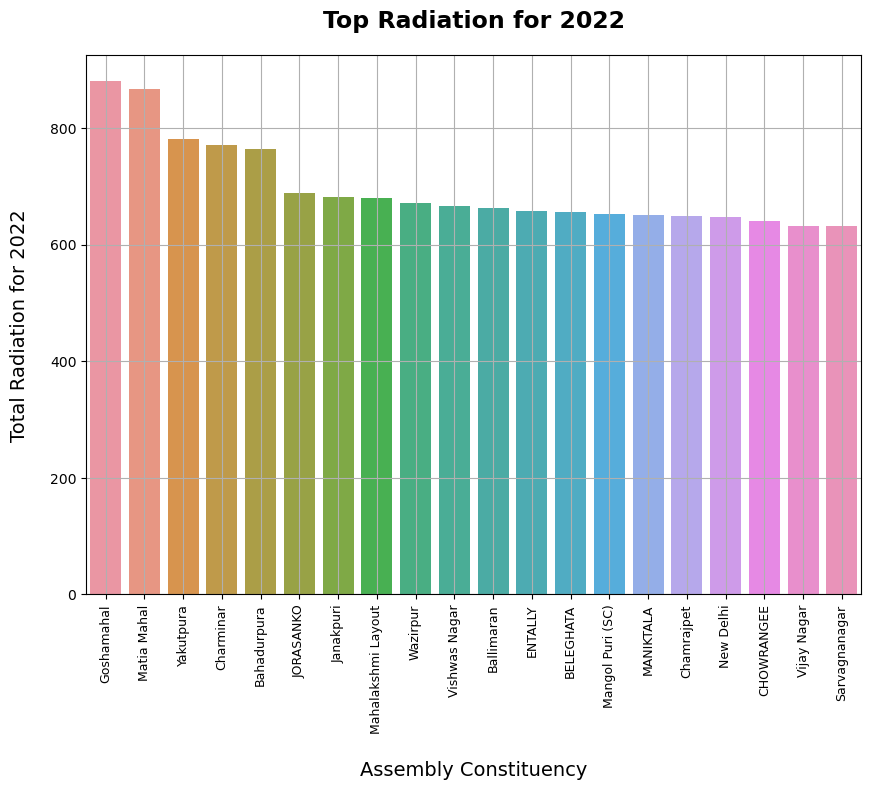

In [9]:
plt.figure(figsize=(10,7))

sns.barplot(data=top, x="AC", y="Total 2022")
plt.title("Top Radiation for 2022", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9,rotation = 90)
plt.xlabel("Assembly Constituency", fontsize=14, labelpad=20)
plt.ylabel("Total Radiation for 2022", fontsize=14, labelpad=15)
plt.grid()
plt.show()

## 2. Absolute Growth between 2016 and 2022

In [10]:
ac=list()
ya16=list()
ya17=list()
ya18=list()
ya19=list()
ya20=list()
ya21=list()
ya22=list()

for i in range(rows):
    ac.append(r2022.iloc[i,0])
    ya16.append(r2016.iloc[i,5])
    ya17.append(r2017.iloc[i,5])
    ya18.append(r2018.iloc[i,5])
    ya19.append(r2019.iloc[i,5])
    ya20.append(r2020.iloc[i,5])
    ya21.append(r2021.iloc[i,5])
    ya22.append(r2022.iloc[i,5])


yearlyavg=pd.DataFrame({'AC':ac,'2016':ya16,'2017':ya17,'2018':ya18,'2019':ya19,'2020':ya20,'2021':ya21,'2022':ya22})

In [11]:
gain=dict()
for i in range(rows):
    gain[ac[i]]=yearlyavg.iloc[i,7]-yearlyavg.iloc[i,1]
    
gain=sorted(gain.items(), key=lambda x:x[1],reverse=True)[:5]

topgain=list()
for i in range(5):
    topgain.append(gain[i][0])
    
topya = yearlyavg[yearlyavg['AC'].isin(topgain)]

topya=topya.T
topya.columns=topya.iloc[0,]
topya=topya.drop('AC')
topya['Year'] = topya.index
col = topya.pop("Year")
topya = topya.rename_axis(None, axis=1)

In [12]:
topya

,Digha,Kumhrar,Akola West,Malabar Hill,Amritsar Central
2016,59.810102,102.579838,41.885366,98.729155,97.042701
2017,62.421908,104.716406,49.463516,102.502264,134.776301
2018,76.664316,121.636977,49.949236,100.851045,131.202498
2019,112.14395,169.275405,67.211323,110.554094,130.471372
2020,101.853256,141.798107,88.006914,107.871505,145.769574
2021,122.334025,160.243845,93.474856,136.063893,168.149885
2022,121.819447,164.441556,99.124893,161.032462,164.550299


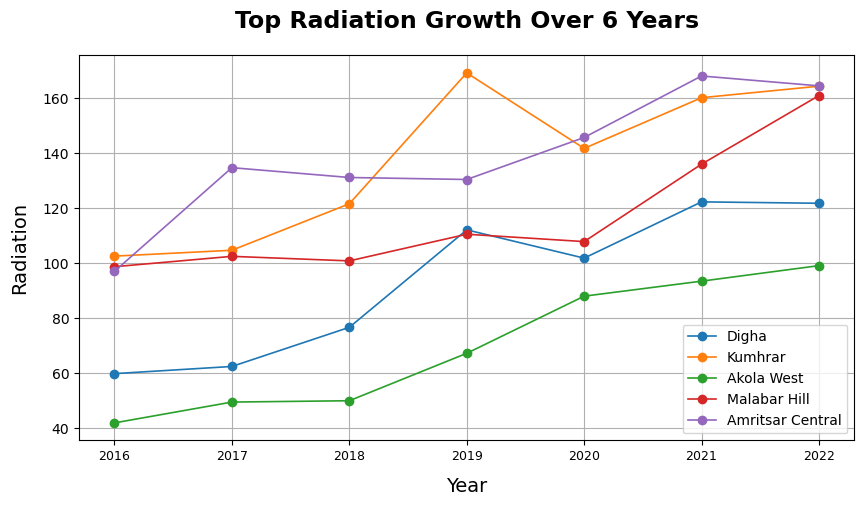

In [13]:
line_plot=topya.plot(y=topya.columns, figsize= (10,5),linewidth=1.2, marker='o') 
plt.title("Top Radiation Growth Over 6 Years", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Radiation", fontsize=14, labelpad=10)
plt.grid()
plt.show();

## 3. Percentage Growth per Year per AC

In [14]:
yearlyavg

,AC,2016,2017,2018,2019,2020,2021,2022
0,Tizit,0.407531,1.376736,1.388377,1.148487,1.330372,1.507682,1.510609
1,Tapi,0.340474,1.317892,1.281119,1.037397,1.299086,1.529951,1.492750
2,Wakching,0.814376,1.548628,1.567261,1.313739,1.535810,1.752510,1.782356
3,Tamlu,1.046676,1.647595,1.508128,1.182383,1.482600,1.717419,1.675881
4,Tuli,1.557454,1.993320,1.693693,1.433553,1.779916,1.842884,2.037081
...,...,...,...,...,...,...,...,...
4177,Ghorawal,1.595675,2.933704,3.300458,3.118999,2.970752,3.159377,3.350039
4178,Robertsganj,1.007759,1.992945,2.073136,2.040578,2.011884,2.192678,2.345081
4179,Obra1,3.815532,4.515831,4.637328,4.454292,4.228851,4.389555,4.945764
4180,Duddhi (SC),2.665402,3.725194,3.864458,3.832086,3.586218,3.866822,4.257161


In [15]:
yav=yearlyavg.copy()
unavailable=list()
for i in range(1,len(yav.columns)):
    for j in range(rows):
        if yav.iloc[j,i]==0 and yav.iloc[j,0] not in unavailable:
            unavailable.append(j)
unavailable=set(unavailable)

for i in unavailable:
    yav=yav.drop(i)
yav.reset_index(drop=True, inplace=True)
yavr=yav.shape[0]

In [16]:
ac=list()
pg2016=list()
pg2017=list()
pg2018=list()
pg2019=list()
pg2020=list()
pg2021=list()
pg2022=list()

for i in yav['AC']:
    ac.append(i)
    
for i in range(yavr):
    pg2016.append(0)
    pg2017.append(((yav['2017'][i]-yav['2016'][i])*100)/(yav['2016'][i]))
    pg2018.append(((yav['2018'][i]-yav['2017'][i])*100)/(yav['2017'][i]))
    pg2019.append(((yav['2019'][i]-yav['2018'][i])*100)/(yav['2018'][i]))
    pg2020.append(((yav['2020'][i]-yav['2019'][i])*100)/(yav['2019'][i]))
    pg2021.append(((yav['2021'][i]-yav['2020'][i])*100)/(yav['2020'][i]))
    pg2022.append(((yav['2022'][i]-yav['2021'][i])*100)/(yav['2021'][i])) 

percentgain=pd.DataFrame({'AC':ac,'2016':pg2016, '2017':pg2017,'2018':pg2018,'2019':pg2019,'2020':pg2020,'2021':pg2021,'2022':pg2022})

In [17]:
percentgain

,AC,2016,2017,2018,2019,2020,2021,2022
0,Tizit,0,237.823690,0.845564,-17.278447,15.836957,13.327857,0.194146
1,Tapi,0,287.075393,-2.790275,-19.024113,25.225467,17.771399,-2.431527
2,Wakching,0,90.161375,1.203210,-16.176138,16.903741,14.109831,1.703050
3,Tamlu,0,57.412177,-8.464903,-21.599274,25.390849,15.838316,-2.418660
4,Tuli,0,27.985741,-15.031518,-15.359381,24.161206,3.537683,10.537650
...,...,...,...,...,...,...,...,...
4174,Ghorawal,0,83.853445,12.501412,-5.498008,-4.753024,6.349414,6.034801
4175,Robertsganj,0,97.760030,4.023738,-1.570481,-1.406159,8.986287,6.950525
4176,Obra1,0,18.353914,2.690469,-3.947013,-5.061199,3.800161,12.671194
4177,Duddhi (SC),0,39.761057,3.738441,-0.837688,-6.416043,7.824535,10.094545


In [18]:
maxpg=dict()
for i in range(len(percentgain['AC'])):
    maxpg[percentgain['AC'][i]]=(percentgain['2022'][i])

In [19]:
sortedpg = percentgain.sort_values(by='2022',ascending=False)
cur=sortedpg[:5]

In [20]:
cur=cur.T
cur.columns=cur.iloc[0,]
cur=cur.drop('AC')
cur['Year'] = cur.index
col=cur.pop("Year")
cur=cur.rename_axis(None, axis=1)
cur

,Naharkatia,Talwandi Sabo,Dabwali,Seoni-Malwa,Haldwani
2016,0,0,0,0,0
2017,-10.156387,19.551725,31.486462,178.976678,-1.844371
2018,-24.931541,1.436281,3.660471,-34.334378,0.408725
2019,22.261837,8.554817,0.208137,59.765056,-9.947054
2020,4.35583,-15.765912,-4.28482,-24.891186,-15.225293
2021,-11.587649,4.13677,21.35007,3.211561,54.901968
2022,161.537091,127.682208,111.320276,95.78427,66.205908


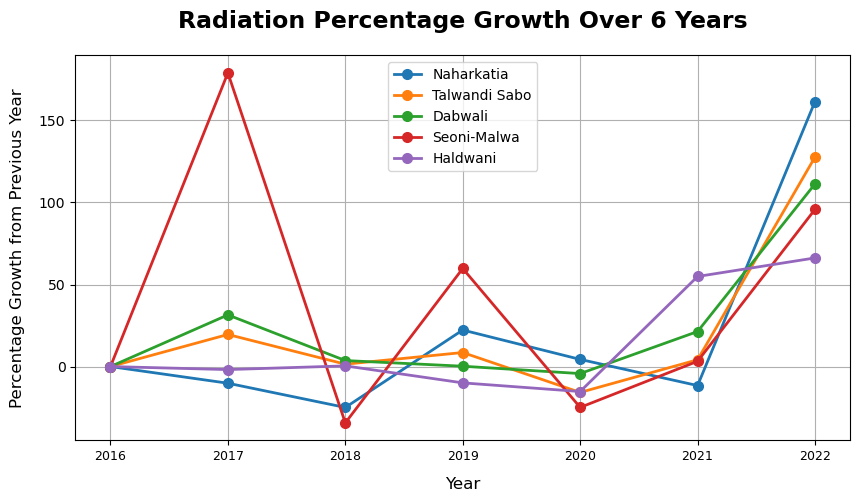

In [21]:
pgplot=cur.plot(y=cur.columns, figsize= (10,5),linewidth=2, marker='o',markersize=7) 
plt.title("Radiation Percentage Growth Over 6 Years", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9)
plt.xlabel("Year", fontsize=12, labelpad=10)
plt.ylabel("Percentage Growth from Previous Year", fontsize=12, labelpad=10)
plt.grid()
plt.show();

## 4. Delta and Percetange Delta

In [22]:
delta=yearlyavg.drop(['2017','2018','2019','2020','2021'],axis=1)

In [23]:
ac=list()
change=list()
pchange=list()

for i in delta['AC']:
    ac.append(i)

for i in range(len(ac)): 
    c=delta['2022'][i]-delta['2016'][i]
    change.append(c)    
    
for i in range(len(ac)):
    if (delta['2016'][i]==0):
         pchange.append(0)
    else:
        pc=(change[i]*100)/(delta['2016'][i])
        pchange.append(pc)  

delta['Delta']=change
delta['Percentage Delta']=pchange

In [24]:
deldict=dict()
for i in range(len(ac)):
    deldict[ac[i]]=pchange[i]

deldict=sorted(deldict.items(), key=lambda x:x[1],reverse=True)
topdelac=list()
for i in range(10):
    topdelac.append(deldict[i][0])

topdel=delta[0:0]
for n in topdelac:
    temp=delta[delta['AC']==n]
    topdel=pd.concat([topdel,temp],axis=0,ignore_index=True)

In [25]:
topdel

,AC,2016,2022,Delta,Percentage Delta
0,Liromoba,0.010034,1.229311,1.219277,12151.558888
1,Changlang South,0.026980,1.232133,1.205153,4466.830044
2,Pongchou-Wakka,0.027638,1.181680,1.154042,4175.564577
3,Miao,0.036189,1.149590,1.113401,3076.621395
4,Pangin,0.043550,1.179293,1.135743,2607.906687
5,Mariyang-Geku,0.068011,1.123755,1.055744,1552.323182
6,Tobu,0.085020,1.391086,1.306066,1536.182201
7,Mechuka,0.078147,1.260729,1.182582,1513.287711
8,Tezu,0.081172,1.265863,1.184690,1459.473770
9,Likabali,0.083524,1.302394,1.218870,1459.304725


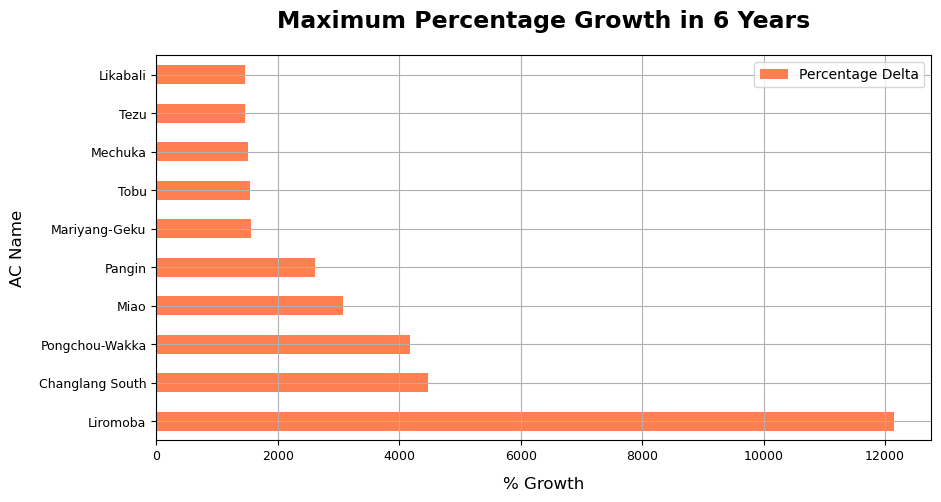

In [26]:
ax=topdel.plot(x="AC", y=["Percentage Delta"],
                   color=['coral'],
                   kind="barh",
                   figsize=(10,5),
                   grid=True)
ax.set_xlabel("% Growth",fontsize=12, labelpad=10)
ax.set_ylabel("AC Name", fontsize=12, labelpad=10)
ax.set_title("Maximum Percentage Growth in 6 Years", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

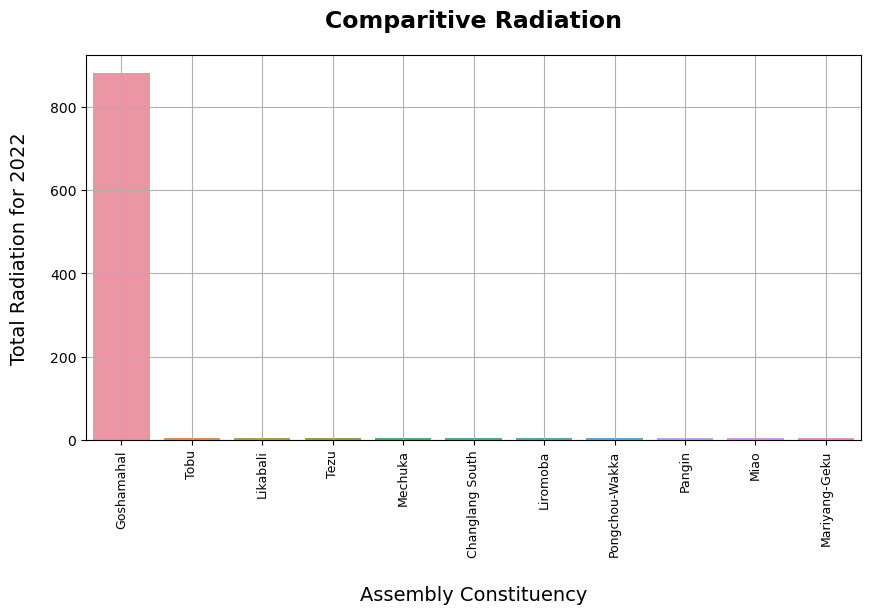

In [27]:

names=list()
for i in topdel['AC']:
    names.append(i)

topdelabsname=list()
topdelabsvalue=list()
for i in t2022:
    if i[0] in names:
        topdelabsname.append(i[0])
        topdelabsvalue.append(i[1])
        
topdelabs=pd.DataFrame({'AC':topdelabsname,'Total 2022':topdelabsvalue})     
comp1=topsorted[:1].drop(['Normalized'],axis=1)
topdelabs=pd.concat([comp1,topdelabs],axis=0,ignore_index=True)

plt.figure(figsize=(10,5))
sns.barplot(data=topdelabs, x="AC", y="Total 2022")
plt.title("Comparitive Radiation", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9,rotation = 90)
plt.xlabel("Assembly Constituency", fontsize=14, labelpad=20)
plt.ylabel("Total Radiation for 2022", fontsize=14, labelpad=15)
plt.grid()
plt.show()

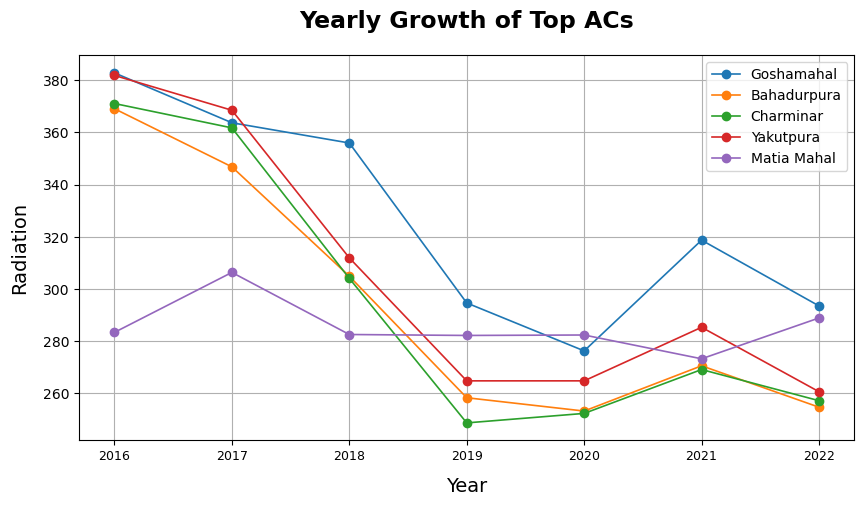

In [28]:
topabsname=list()
toppcgain=yearlyavg.copy()

for i in topsorted[:5]['AC']:
    topabsname.append(i)
    
for i in range(len(yearlyavg)):
        if yearlyavg['AC'][i] not in topabsname:
            toppcgain=toppcgain.drop(i)

toppcgain=toppcgain.T
toppcgain.columns=toppcgain.iloc[0,]
toppcgain=toppcgain.drop('AC')
toppcgain['Year'] = toppcgain.index
col = toppcgain.pop("Year")
toppcgain = toppcgain.rename_axis(None, axis=1)

line_plot=toppcgain.plot(y=toppcgain.columns, figsize= (10,5),linewidth=1.2, marker='o') 
plt.title("Yearly Growth of Top ACs", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Radiation", fontsize=14, labelpad=10)
plt.grid()
plt.show();

In [29]:
topdelgain=yearlyavg.copy()
    
for i in range(len(yearlyavg)):
        if yearlyavg['AC'][i] not in topdelabsname:
            topdelgain=topdelgain.drop(i)


In [30]:
topdelgain

,AC,2016,2017,2018,2019,2020,2021,2022
16,Tobu,0.085020,1.017848,1.017368,0.817897,1.084929,1.413346,1.391086
1266,Mechuka,0.078147,0.942768,0.890130,0.880887,1.110049,1.257791,1.260729
1268,Mariyang-Geku,0.068011,0.929778,0.863572,0.708895,0.923643,1.087732,1.123755
1273,Pangin,0.043550,0.979325,0.873247,0.750709,0.996810,1.101062,1.179293
1274,Tezu,0.081172,0.915627,0.948874,0.831203,0.980730,1.077475,1.265863
1276,Liromoba,0.010034,0.960529,0.856797,0.698048,1.024864,1.109319,1.229311
1294,Likabali,0.083524,0.983494,0.953979,0.801418,1.002062,1.133022,1.302394
1297,Miao,0.036189,0.941521,0.808582,0.725908,0.910469,1.081400,1.149590
1312,Changlang South,0.026980,0.996929,0.955084,0.741659,0.888331,1.066510,1.232133
1324,Pongchou-Wakka,0.027638,0.991517,0.948915,0.769280,1.015153,1.208697,1.181680


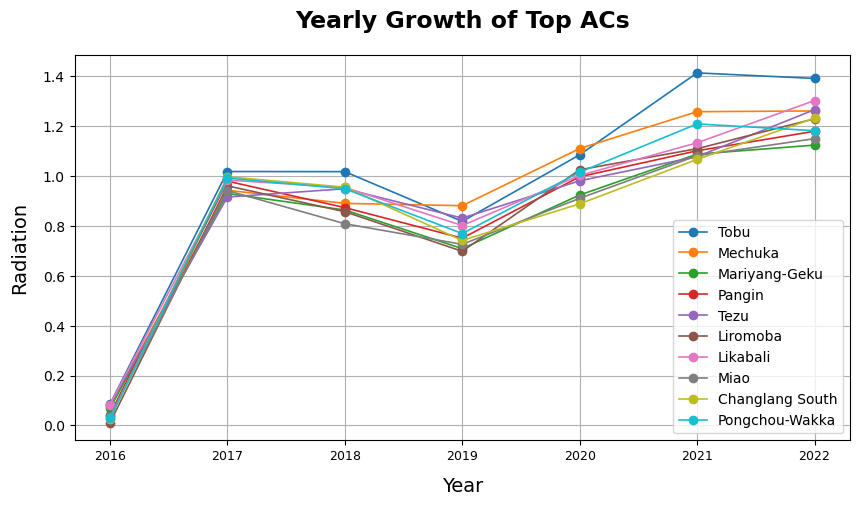

In [31]:
topdelgain=topdelgain.T
topdelgain.columns=topdelgain.iloc[0,]
topdelgain=topdelgain.drop('AC')
topdelgain['Year'] = topdelgain.index
col = topdelgain.pop("Year")
topdelgain = topdelgain.rename_axis(None, axis=1)

line_plot=topdelgain.plot(y=topdelgain.columns, figsize= (10,5),linewidth=1.2, marker='o') 
plt.title("Yearly Growth of Top ACs", fontsize=17, fontweight='bold', pad=20)
plt.xticks(fontsize=9)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Radiation", fontsize=14, labelpad=10)
plt.grid()
plt.show();